In [1]:
# 科学运算
import pandas as pd 
import numpy as np 
# 绘图
import matplotlib.pyplot as plt 
import seaborn as sns 
# 无视警告
import warnings 
warnings.filterwarnings('ignore')
# %matplotlib inline 

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #设置字体
# sns.set(font='SimHei') #设置中文编码
plt.rcParams['font.family'] = 'SimHei' #选择中文字体

In [2]:
train_cleaned = pd.read_csv('B题-全部数据/order_train1.csv')

In [3]:
import math

# 绘制每个特征的分布  参数（数据集，列，宽，高，高距，宽距）
def plot_distribution(dataset,cols=5,width=20,height=15,hspace=0.2,wspace=0.5):
    plt.style.use('seaborn-whitegrid')  # 绘制风格 白网格
    fig = plt.figure(figsize=(width,height))  # 画布大小
    # 子图调整 上下左右都是None，就是设置图形的位置，边距
    fig.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=wspace,hspace=hspace) #为了好看
    #ceil：天花板。 取dataset的列，然后转换成float，除以我们的cols。 目的是求得我们要画多少行的图，例如求出来是3.5，我们就画4行
    rows = math.ceil(float(dataset.shape[1]) / cols)
    #以上都是准备工作
    
    for i,column in enumerate(dataset[code_col+num_col].columns):   # 遍历特征 （索引和列名） 每一列都是特征，所以我们遍历列就是遍历特征
        ax = fig.add_subplot(rows,cols,i+1)  # 每遍历一下我们添加一个子图，我们子图占多少行多少列就已经确定了
        ax.set_title(column)  # 设置标题

        if column in code_col:  # 判断列的数据类型  object指的是非数据型特征
            g = sns.countplot(y=column,data=dataset)  #画统计数量的条形图
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column]) #绘制分布图
            plt.xticks(rotation=25)

In [4]:
code_col = ['sales_region_code','first_cate_code','second_cate_code','sales_chan_name']
num_col = ['item_price','ord_qty']

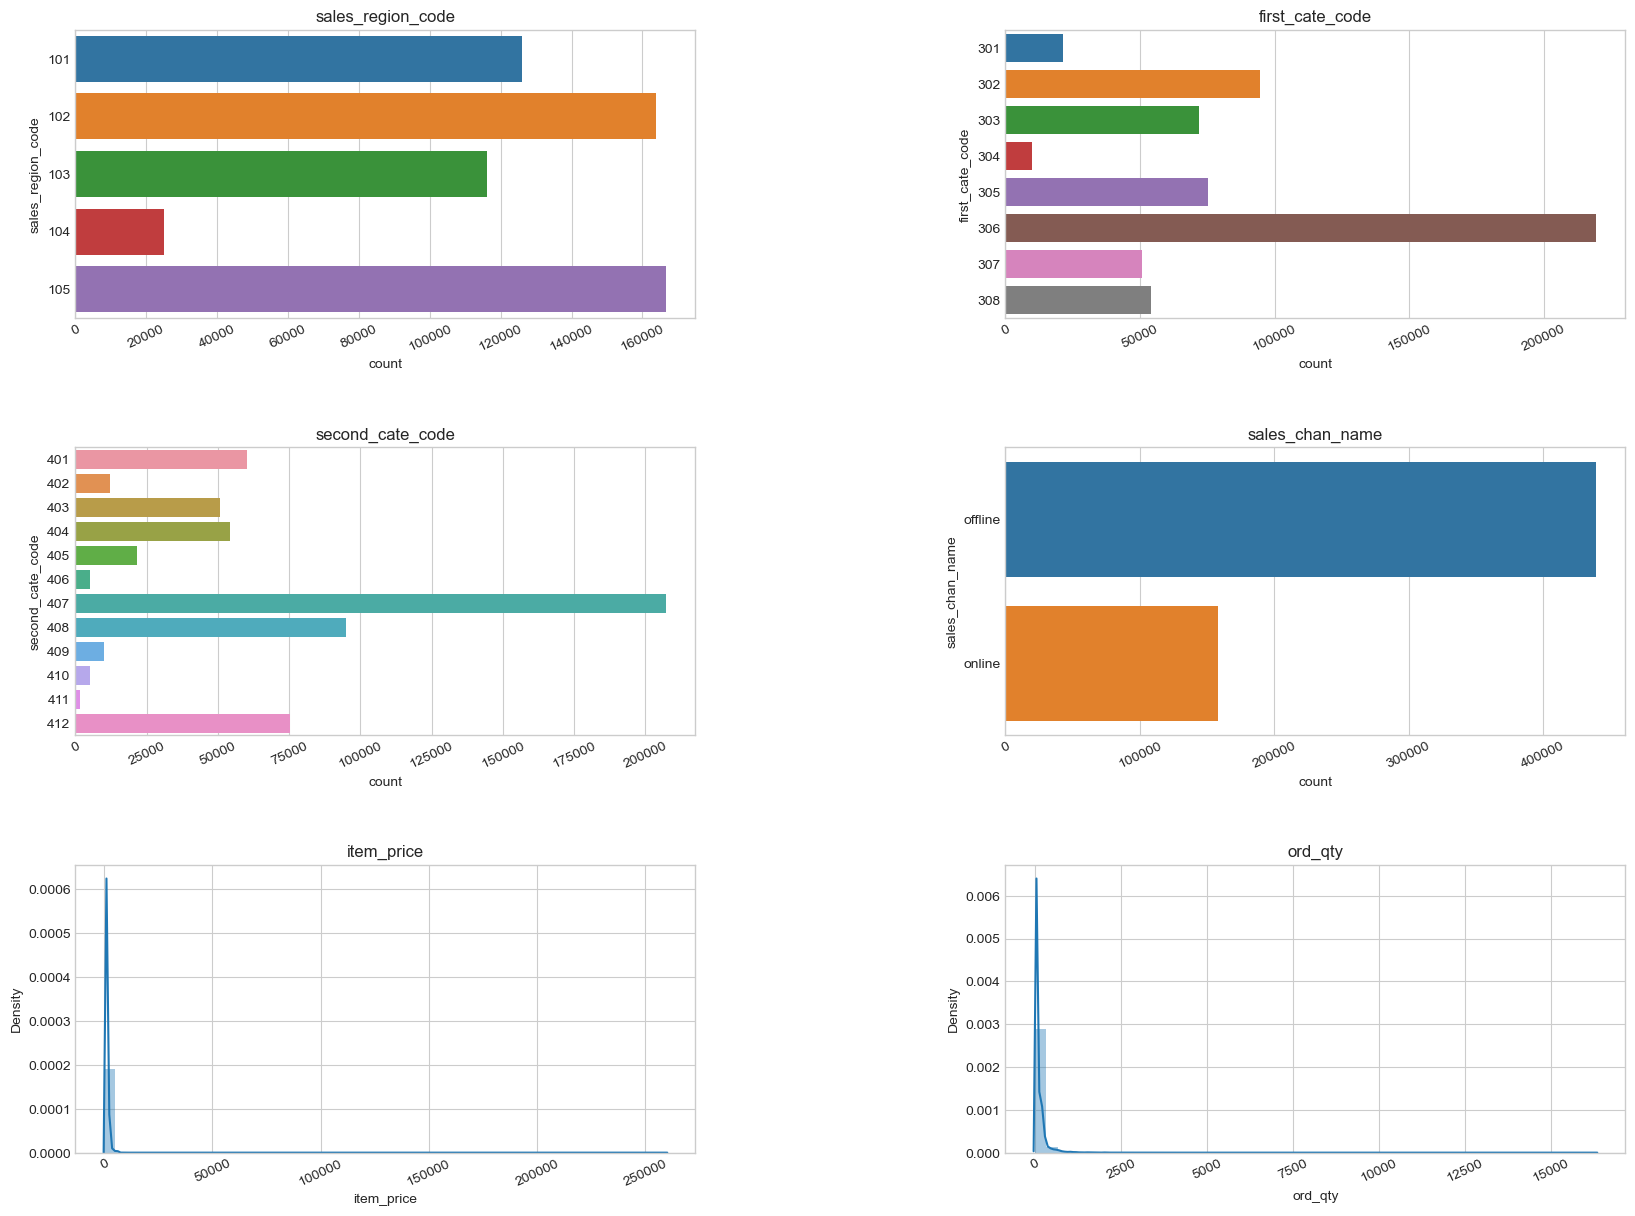

In [5]:
import warnings
warnings.filterwarnings('ignore') 
plot_distribution(train_cleaned,cols=2,width=20,height=20,hspace=0.45,wspace=0.5)

## （1） 产品的不同价格对需求量的影响；

### 1.1分区间可视化：将价格划分为不同的区间，计算每个区间的需求量，并以条形图的形式展示。

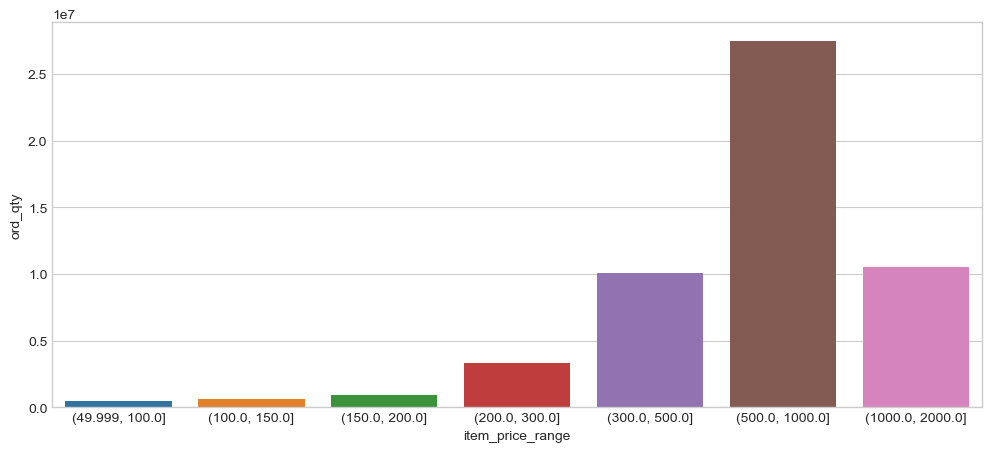

In [6]:
train_cleaned['item_price_range'] = pd.cut(train_cleaned['item_price'], bins=[50, 100, 150, 200, 300, 500, 1000, 2000], include_lowest=True)
price_range_sales = train_cleaned.groupby('item_price_range')['ord_qty'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(x='item_price_range', y='ord_qty', data=price_range_sales)
plt.show()

In [7]:
price_range_sales

,item_price_range,ord_qty
0,"(49.999, 100.0]",491261
1,"(100.0, 150.0]",585015
2,"(150.0, 200.0]",912706
3,"(200.0, 300.0]",3286165
4,"(300.0, 500.0]",10070233
5,"(500.0, 1000.0]",27505774
6,"(1000.0, 2000.0]",10500690


## （2） 产品所在区域对需求量的影响，以及不同区域的产品需求量有何特性；

### 2.1 计算每个区域的总需求量，并绘制条形图进行可视化，以直观地了解不同区域的需求量差异。

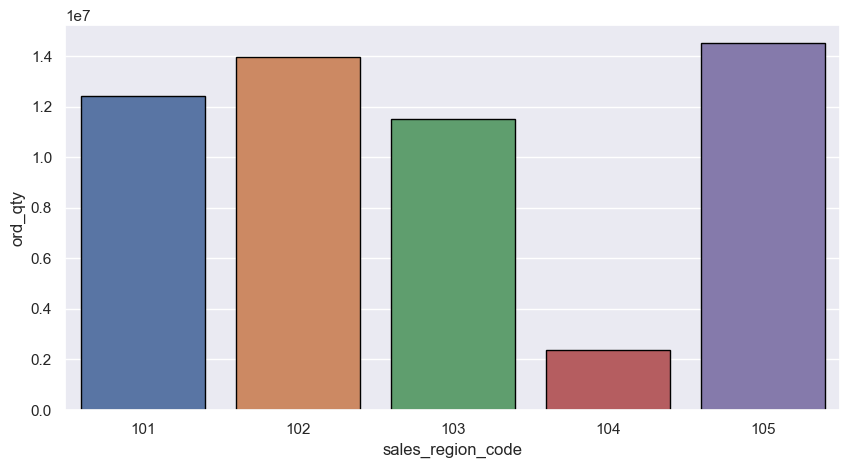

In [8]:
sns.set(rc={'patch.edgecolor': 'black', 'patch.linewidth': 1})
sales_by_region = train_cleaned.groupby('sales_region_code')['ord_qty'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='sales_region_code', y='ord_qty', data=sales_by_region)
plt.show()

### 2.2 不同区域的产品需求量的分布特征，例如需求量的均值、中位数、标准差等。我们可以使用箱线图或小提琴图对这些统计量进行可视化。

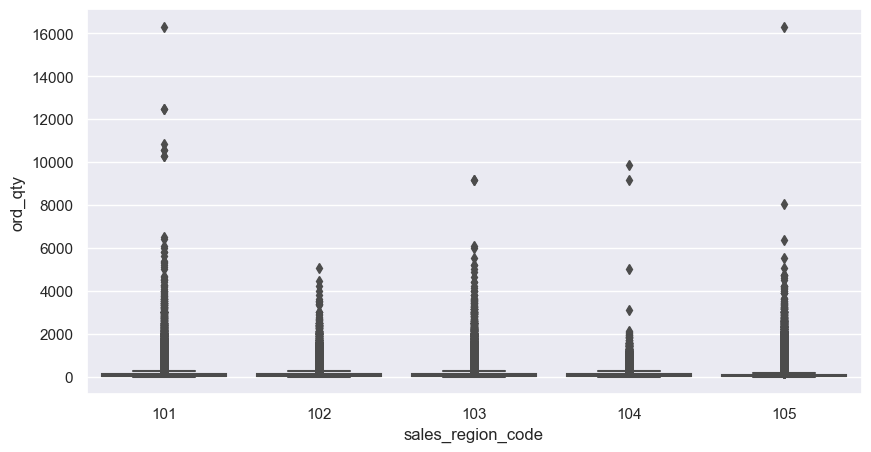

In [9]:
plt.figure(figsize=(10, 5))
sns.set_style('white')
sns.set(rc={'patch.edgecolor': 'black', 'patch.linewidth': 1})
sns.boxplot(x='sales_region_code', y='ord_qty', data=train_cleaned)
plt.show()

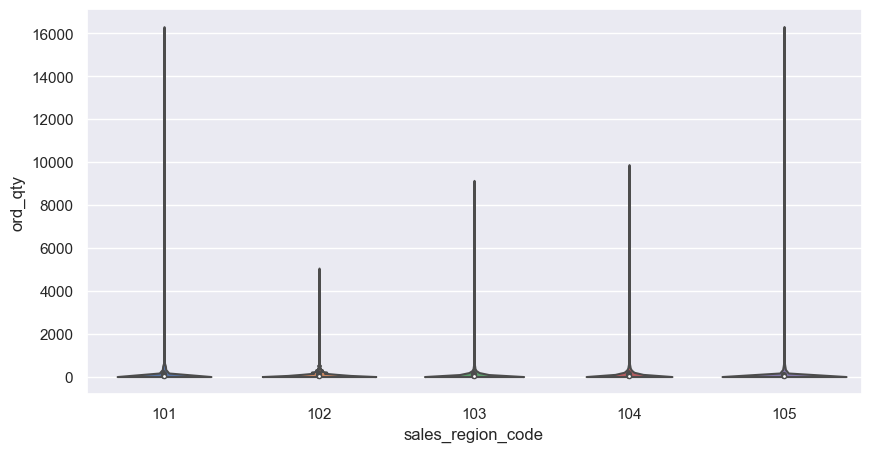

In [10]:
plt.figure(figsize=(10, 5))
sns.set_style('white')
sns.set(rc={'patch.edgecolor': 'black', 'patch.linewidth': 1})
sns.violinplot(x='sales_region_code', y='ord_qty', data=train_cleaned, cut=0)
plt.show()

### 2.3 分析不同区域的产品需求量随时间的变化趋势。首先需要将时间数据转换为合适的格式，然后计算每个区域在每个时间点的需求量，并绘制折线图。

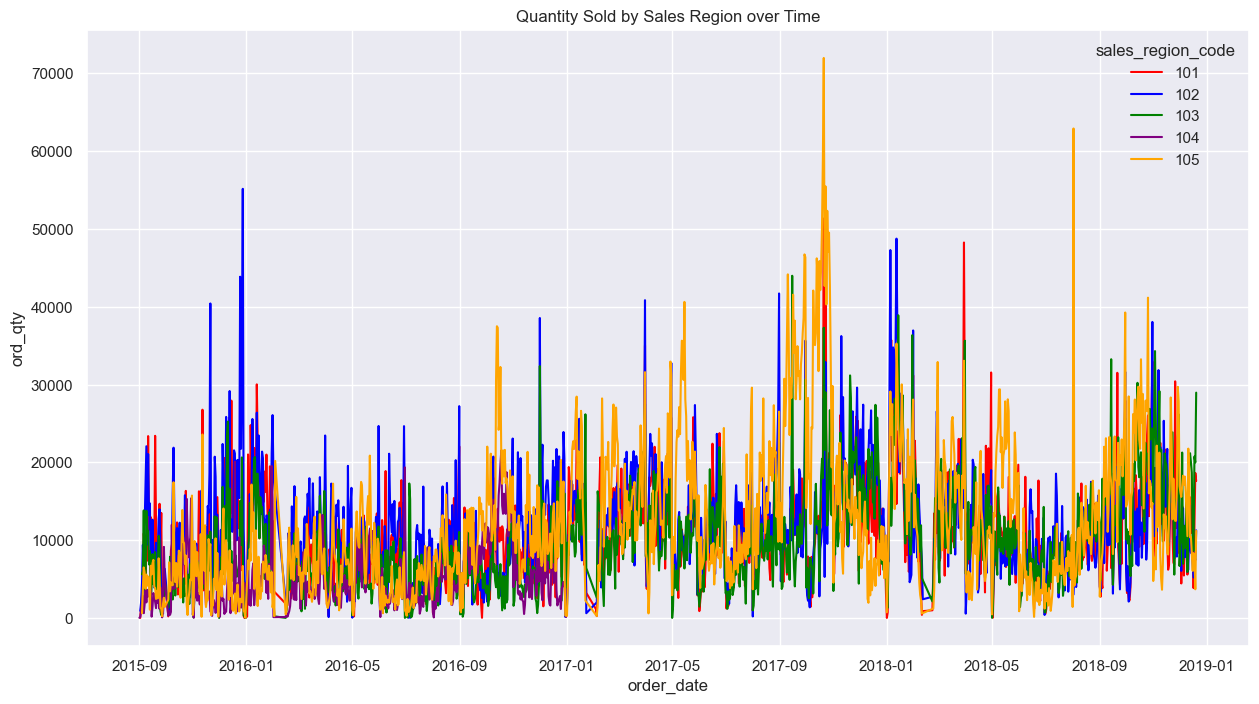

In [11]:
# 将时间数据转换为 datetime 类型
train_cleaned['order_date'] = pd.to_datetime(train_cleaned['order_date'], format='%Y-%m-%d')

# 自定义颜色
custom_palette = {
    101: "red",
    102: "blue",
    103: "green",
    104: "purple",
    105: "orange"
}

# 计算每个区域在每个时间点的需求量
quantity_by_region_and_time = train_cleaned.groupby(['sales_region_code', 'order_date'])['ord_qty'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x='order_date', y='ord_qty', hue='sales_region_code', data=quantity_by_region_and_time, palette=custom_palette)
plt.title('Quantity Sold by Sales Region over Time')
plt.show()

In [12]:
quantity_by_region_and_time

,sales_region_code,order_date,ord_qty
0,101,2015-09-02,18
1,101,2015-09-04,2866
2,101,2015-09-05,4875
3,101,2015-09-06,10872
4,101,2015-09-07,9239
...,...,...,...
5100,105,2018-12-16,6062
5101,105,2018-12-17,8331
5102,105,2018-12-18,8017
5103,105,2018-12-19,3694


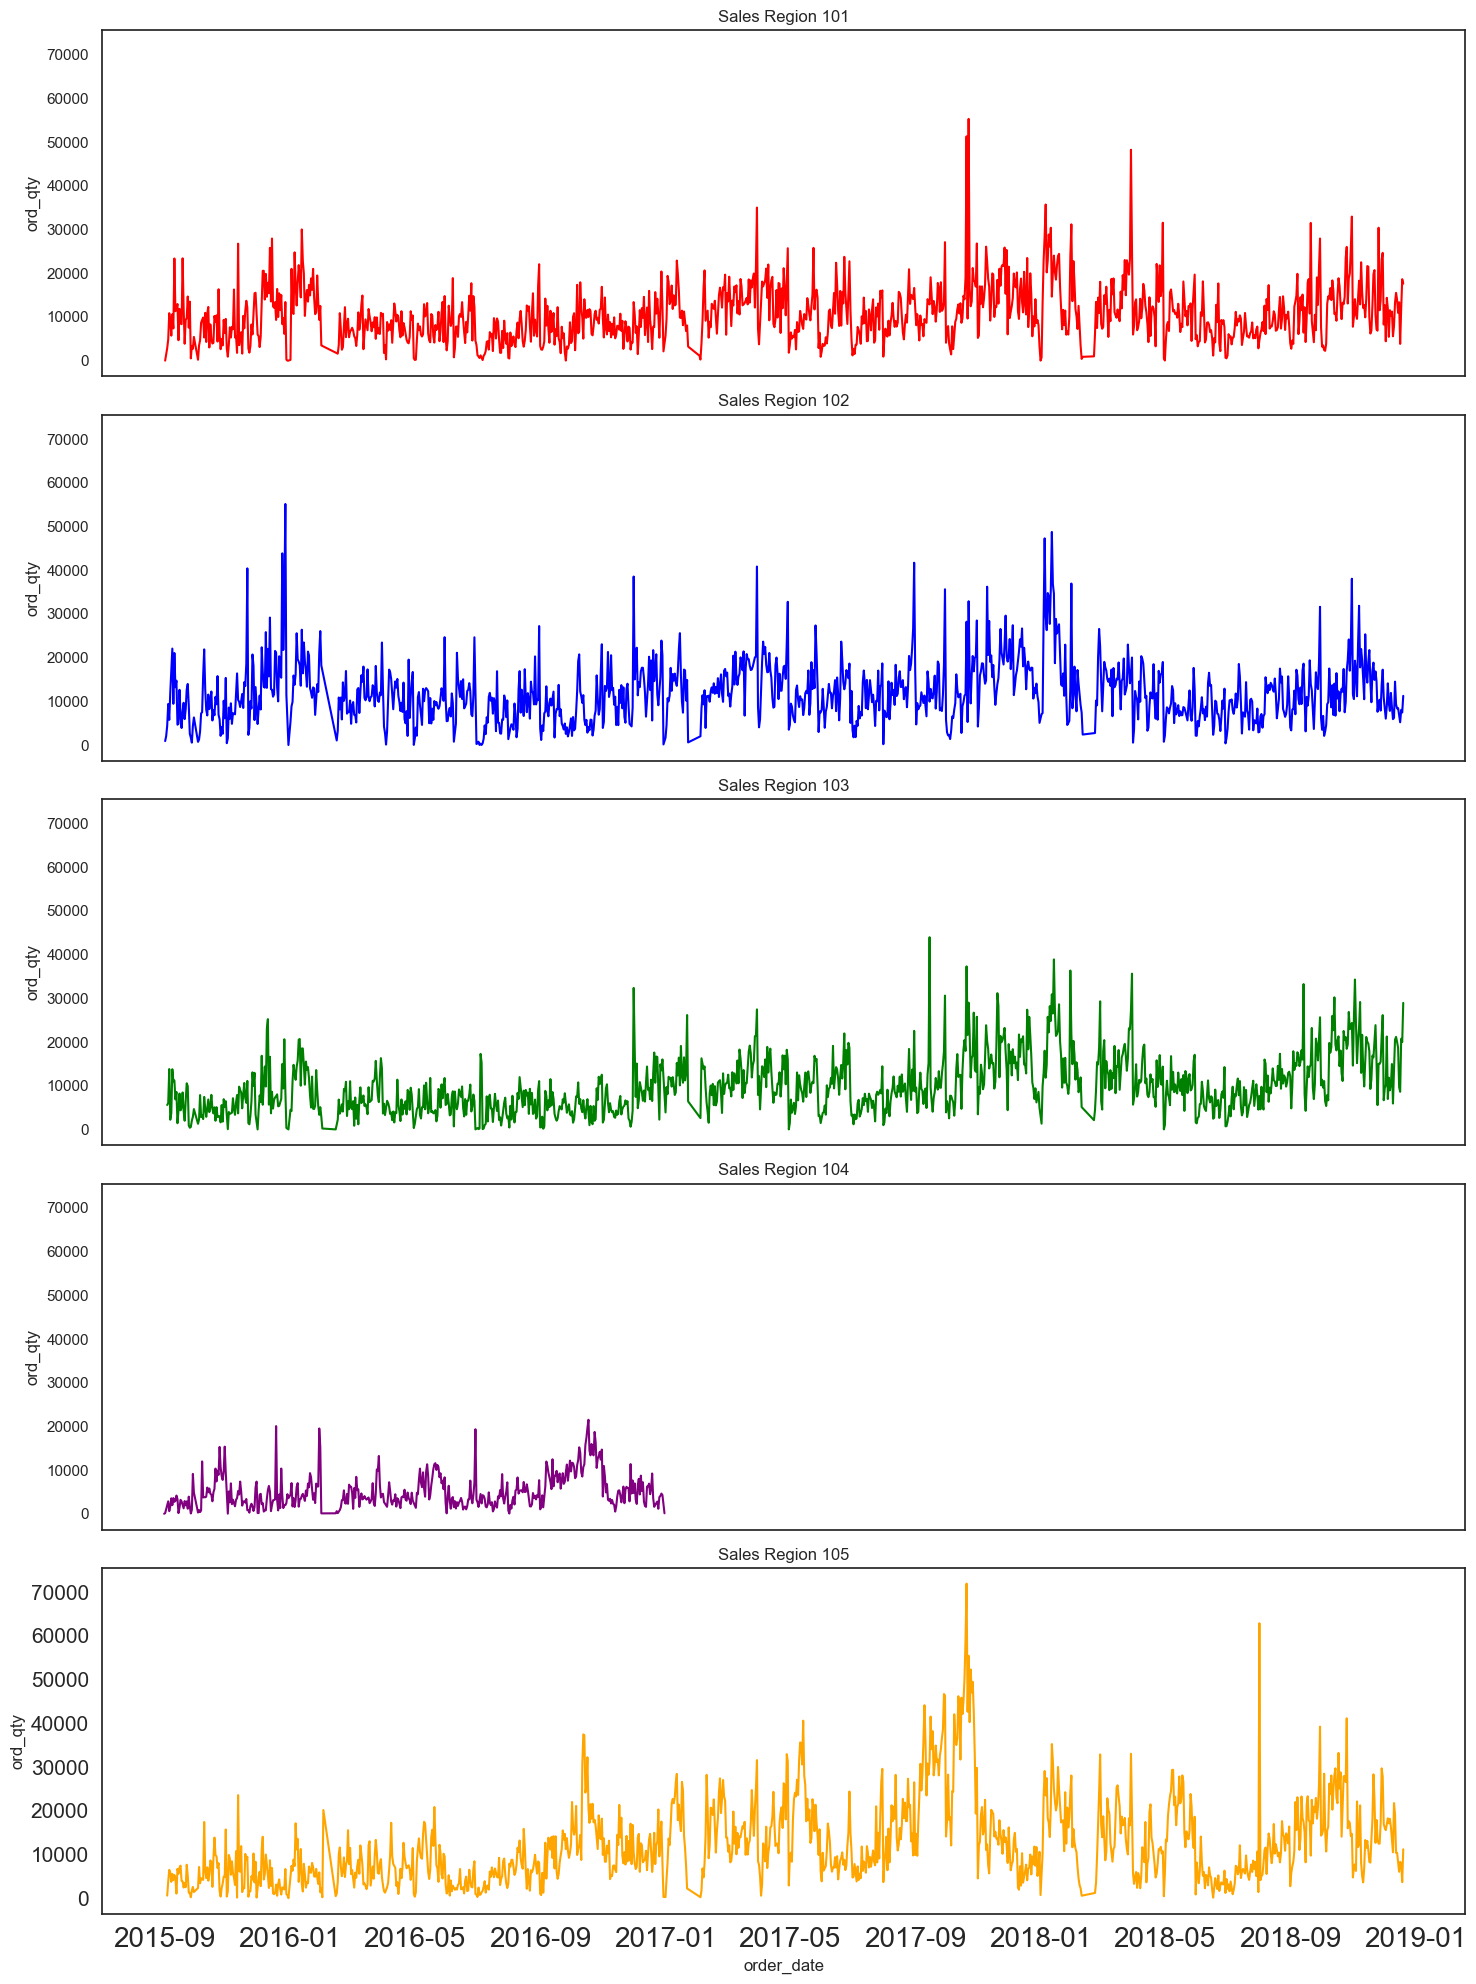

In [13]:
import matplotlib.pyplot as plt

# 将时间数据转换为 datetime 类型
train_cleaned['order_date'] = pd.to_datetime(train_cleaned['order_date'], format='%Y-%m-%d')

sns.set_style("white")
# 自定义颜色
custom_palette = {
    101: "red",
    102: "blue",
    103: "green",
    104: "purple",
    105: "orange"
}

# 计算每个区域在每个时间点的需求量
quantity_by_region_and_time = train_cleaned.groupby(['sales_region_code', 'order_date'])['ord_qty'].sum().reset_index()

# 创建子图网格
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20), sharex=True, sharey=True)

# 在每个子图中绘制对应区域的数据
for i, region in enumerate(sorted(train_cleaned['sales_region_code'].unique())):
    region_data = quantity_by_region_and_time[quantity_by_region_and_time['sales_region_code'] == region]
    sns.lineplot(x='order_date', y='ord_qty', data=region_data, ax=axes[i], color=custom_palette[region])
    axes[i].set_title(f'Sales Region {region}')
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

## （3） 不同销售方式（线上和线下）的产品需求量的特性；

### 3.1 绘制饼图和柱状图

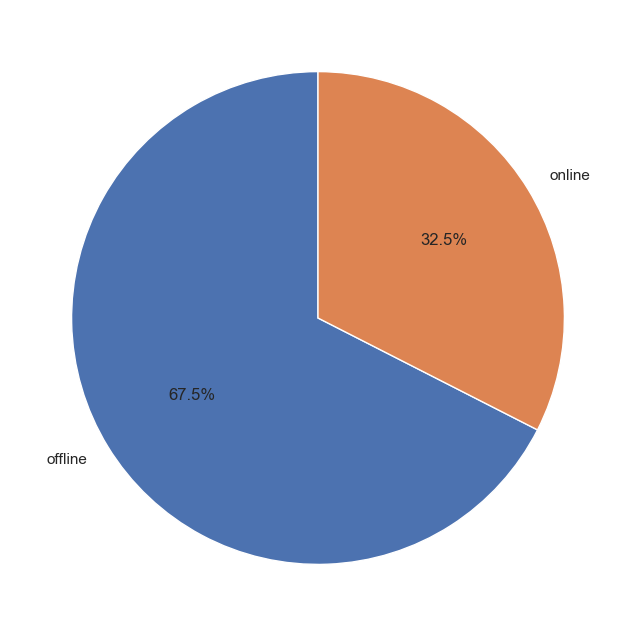

In [14]:
sales_by_channel = train_cleaned.groupby('sales_chan_name')['ord_qty'].sum()

plt.figure(figsize=(8, 8))
sales_by_channel.plot.pie(autopct='%1.1f%%', startangle=90)
# plt.title('Total Quantity Sold by Sales Channel')
plt.ylabel('')
plt.show()

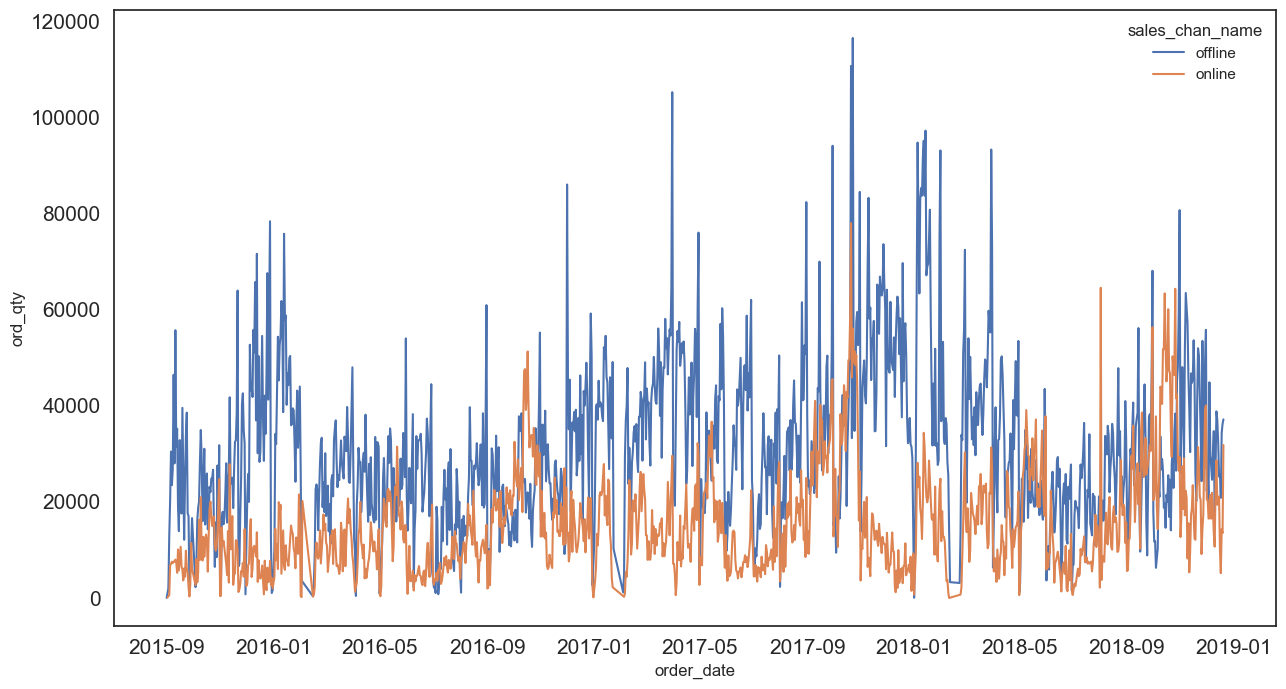

In [15]:
# 2. 不同销售方式的需求量随时间的变化
sns.set_style('white')
quantity_by_channel_and_time = train_cleaned.groupby(['sales_chan_name', 'order_date'])['ord_qty'].sum().reset_index()
plt.figure(figsize=(15, 8))
sns.lineplot(x='order_date', y='ord_qty', hue='sales_chan_name', data=quantity_by_channel_and_time)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

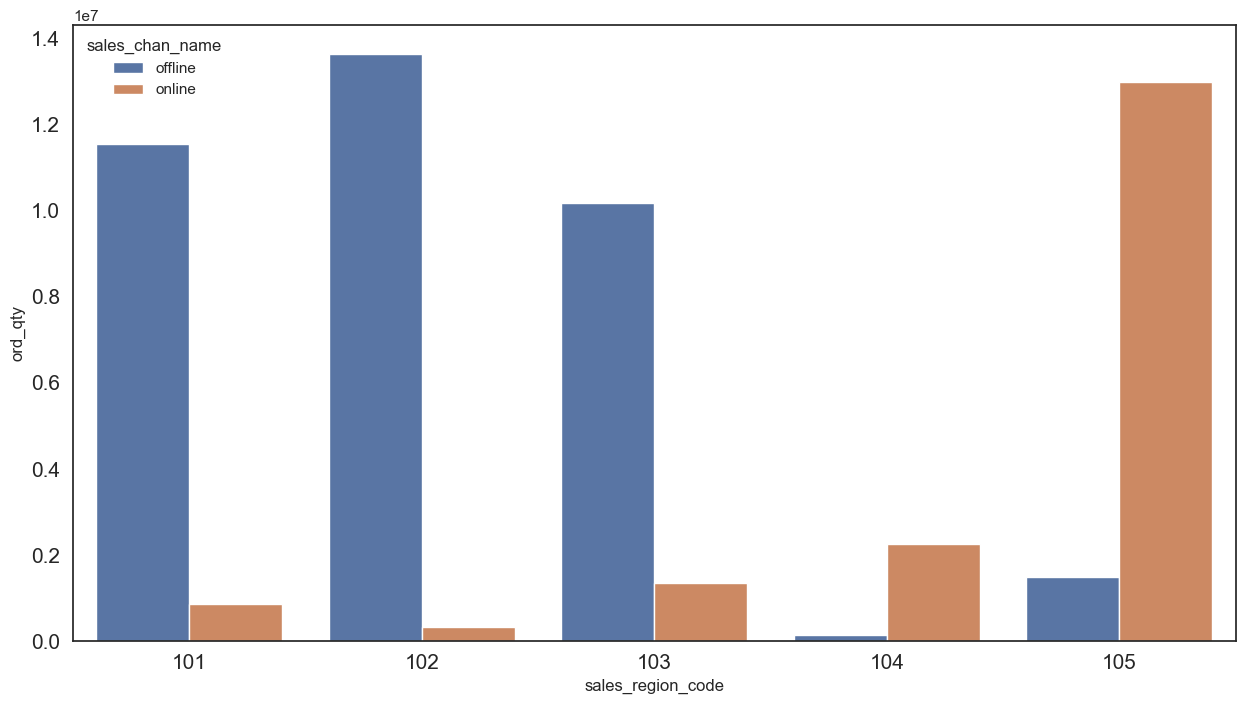

In [16]:
# 3. 不同销售方式在各个区域的需求量
sns.set_style('white')
quantity_by_channel_and_region = train_cleaned.groupby(['sales_chan_name', 'sales_region_code'])['ord_qty'].sum().reset_index()
plt.figure(figsize=(15, 8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(x='sales_region_code', y='ord_qty', hue='sales_chan_name', data=quantity_by_channel_and_region)
plt.show()

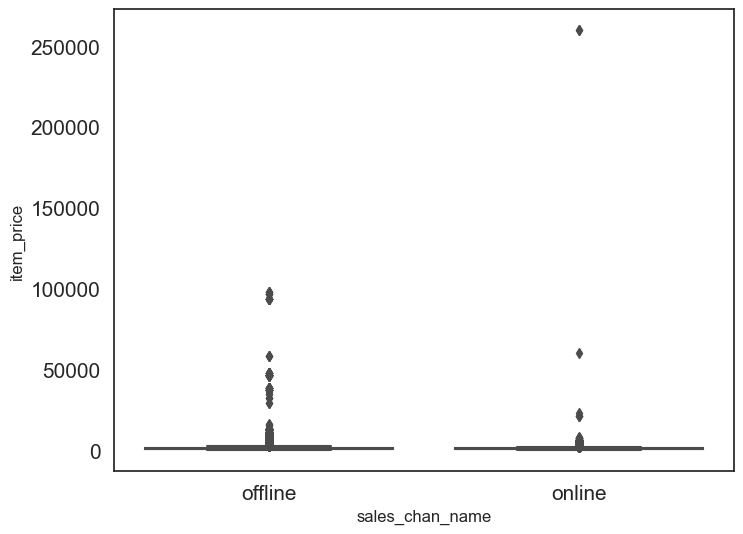

In [17]:
# 4. 不同销售方式的价格分布
plt.figure(figsize=(8, 6))
sns.boxplot(x='sales_chan_name', y='item_price', data=train_cleaned)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## （4） 不同品类之间的产品需求量有何不同点和共同点；

### 4.1 计算每个一级品类（first_cate_code）和二级品类（second_cate_code）的总需求量，并绘制条形图进行可视化

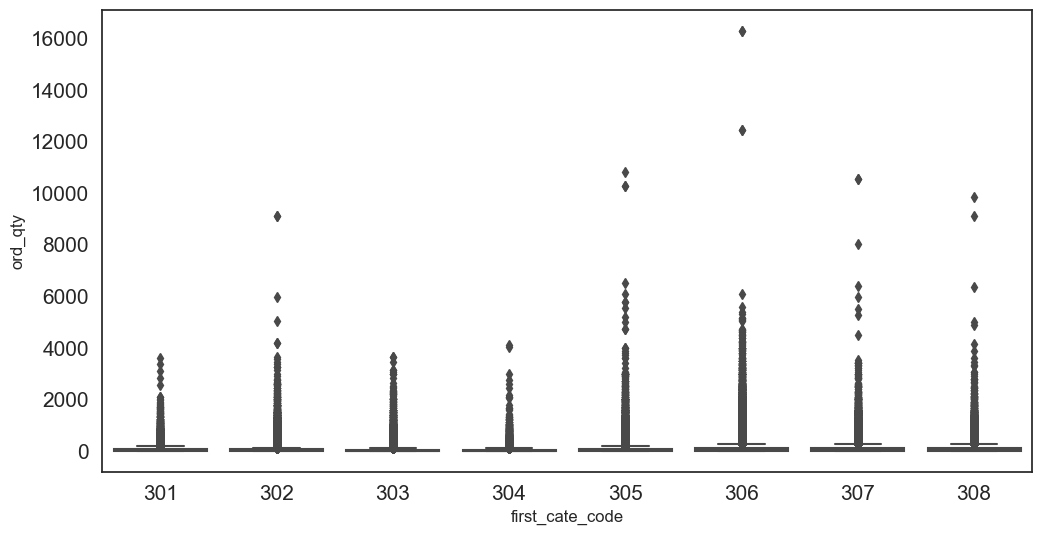

In [18]:
# 1. 不同品类的需求量分布
plt.figure(figsize=(12, 6))
sns.boxplot(x='first_cate_code', y='ord_qty', data=train_cleaned)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 4.2 分析不同品类在不同销售区域的需求量分布。可以使用柱状图或堆叠柱状图进行可视化。

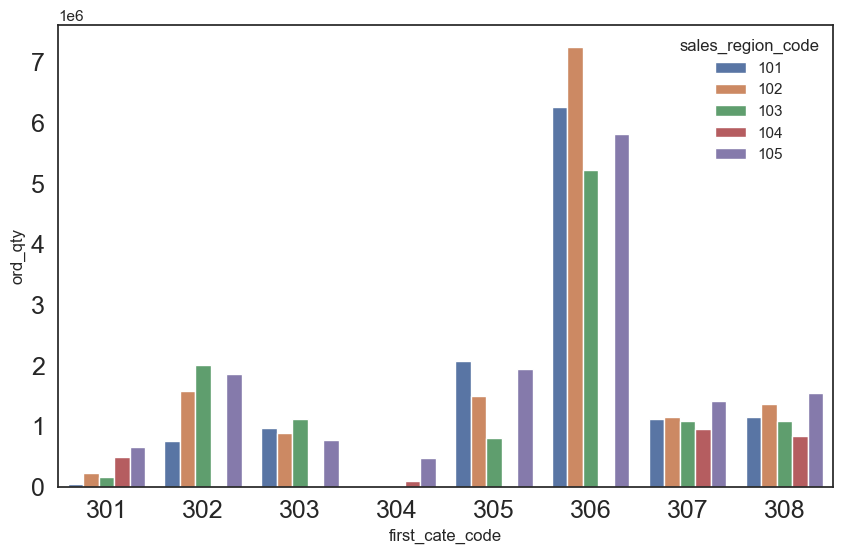

In [19]:
sns.set_style('white')
quantity_by_first_cate_and_region = train_cleaned.groupby(['first_cate_code', 'sales_region_code'])['ord_qty'].sum().reset_index()
quantity_by_second_cate_and_region = train_cleaned.groupby(['second_cate_code', 'sales_region_code'])['ord_qty'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='first_cate_code', y='ord_qty', hue='sales_region_code', data=quantity_by_first_cate_and_region)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

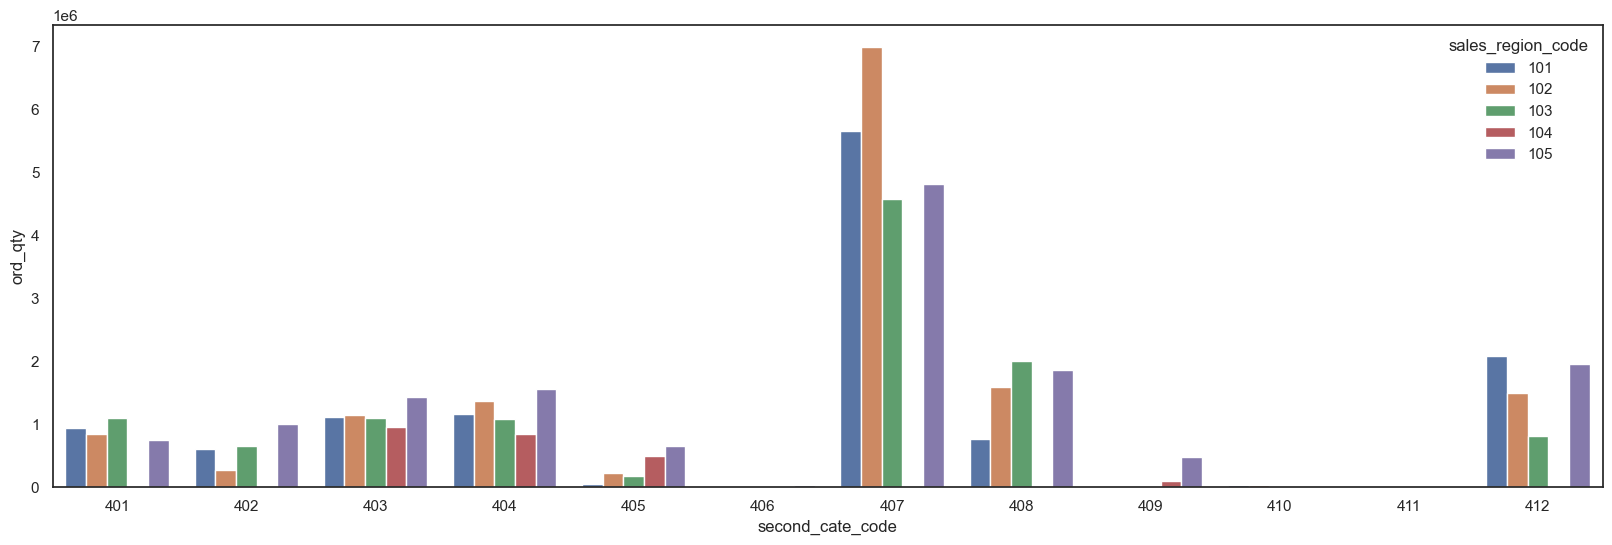

In [20]:
plt.figure(figsize=(20, 6))
sns.barplot(x='second_cate_code', y='ord_qty', hue='sales_region_code', data=quantity_by_second_cate_and_region)
plt.show()

### 4.3 分析不同品类的产品需求量随时间的变化趋势。

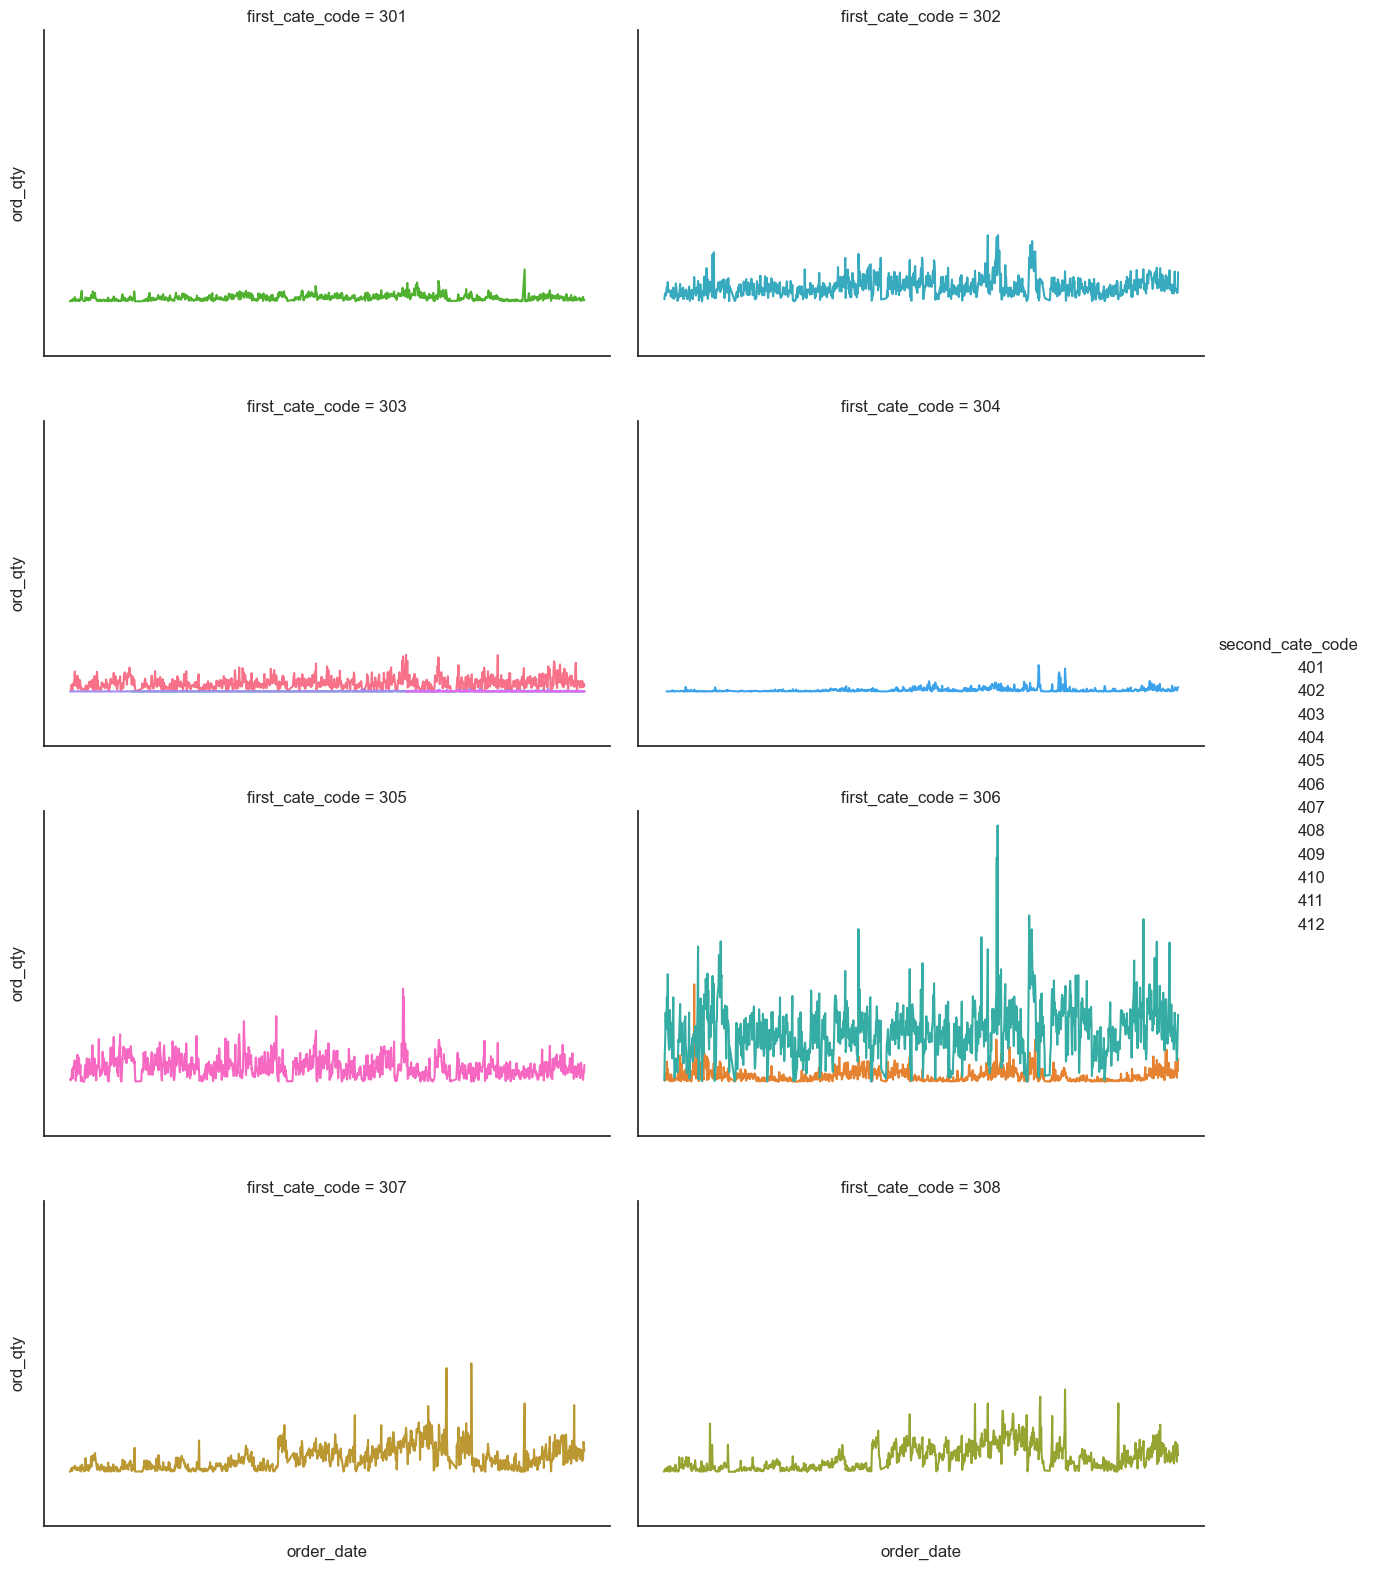

In [21]:
# 2. 不同大类和细类的需求量随时间的变化
quantity_by_category_and_time = train_cleaned.groupby(['first_cate_code', 'second_cate_code', 'order_date'])['ord_qty'].sum().reset_index()

g = sns.FacetGrid(quantity_by_category_and_time, col='first_cate_code', hue='second_cate_code', col_wrap=2, height=4, aspect=1.6)
g.map(sns.lineplot, 'order_date', 'ord_qty')

# 设置字体大小
g.set_xticklabels(fontsize=10)
g.set_yticklabels(fontsize=15)

# 设置图例
g.add_legend(title_fontsize=14, label_order=sorted(train_cleaned['second_cate_code'].unique()), fontsize=12)

# 调整子图间距
g.fig.subplots_adjust(hspace=.2)

plt.show()

## （5） 不同时间段（例如月头、月中、月末等）产品需求量有何特性；

In [22]:
# 将order_date列转换为datetime格式，并提取年、月、日信息
train_cleaned['order_date'] = pd.to_datetime(train_cleaned['order_date'])
train_cleaned['year'] = train_cleaned['order_date'].dt.year
train_cleaned['month'] = train_cleaned['order_date'].dt.month
train_cleaned['day'] = train_cleaned['order_date'].dt.day

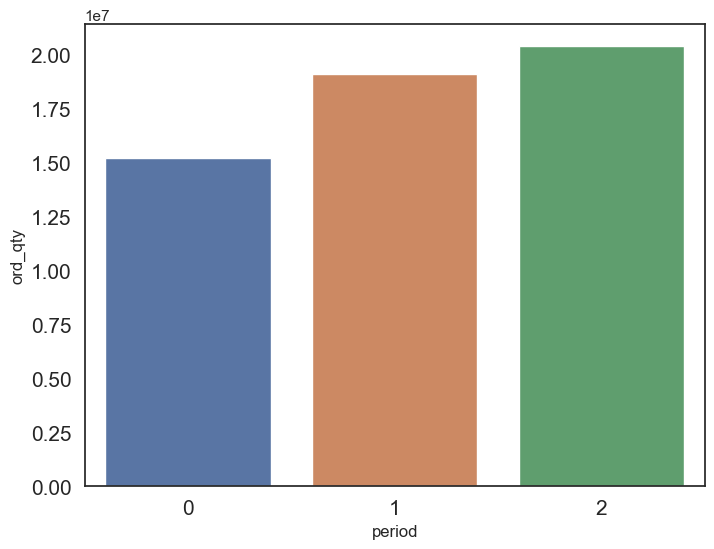

In [23]:
sns.set_style('white')
# 定义时间段分组函数
def get_period(day):
    if day <= 10:
        return '0'
    elif 10 < day <= 20:
        return '1'
    else:
        return '2'

# 根据day列计算时间段
train_cleaned['period'] = train_cleaned['day'].apply(get_period)

# 计算每个时间段的总需求量
period_demand = train_cleaned.groupby('period')['ord_qty'].sum().reset_index()

# 绘制柱状图显示不同时间段的总需求量
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(x='period', y='ord_qty', data=period_demand)
plt.show()

### 5.2 分析每月的需求量分布

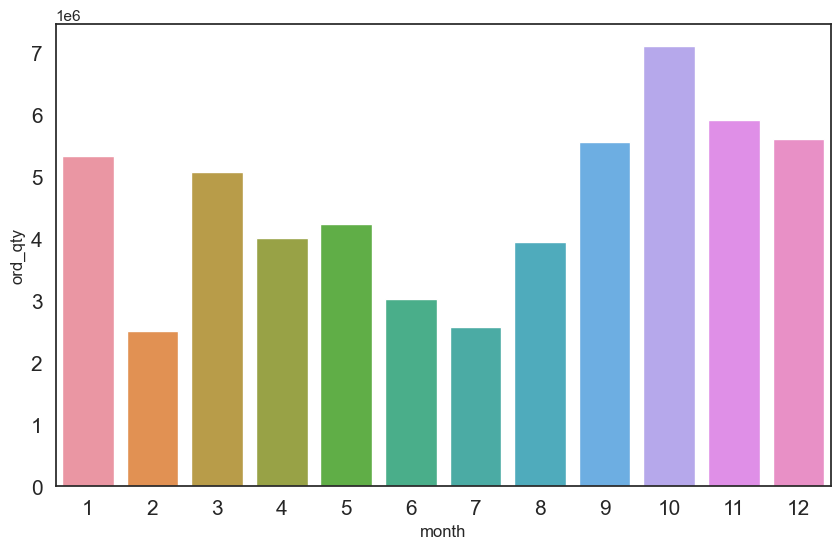

In [24]:
quantity_by_month = train_cleaned.groupby('month')['ord_qty'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='ord_qty', data=quantity_by_month)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

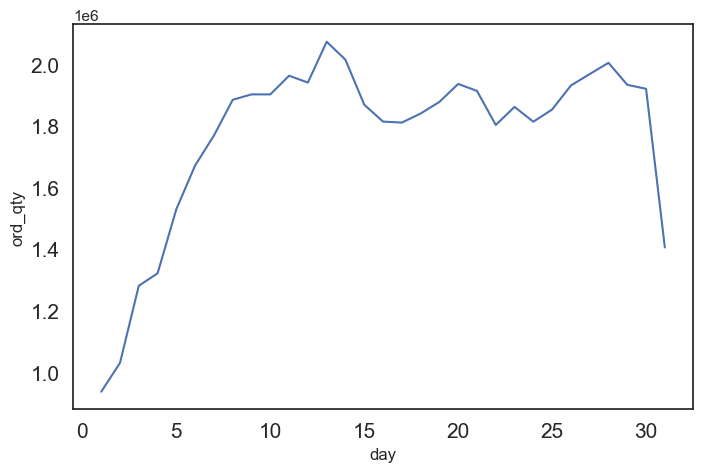

In [25]:
#（5）不同时间段（例如月头、月中、月末等）产品需求量有何特性：
train_cleaned['day'] = train_cleaned['order_date'].dt.day
day_demand = train_cleaned.groupby("day")["ord_qty"].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x="day", y="ord_qty", data=day_demand)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## （6） 节假日对产品需求量的影响；

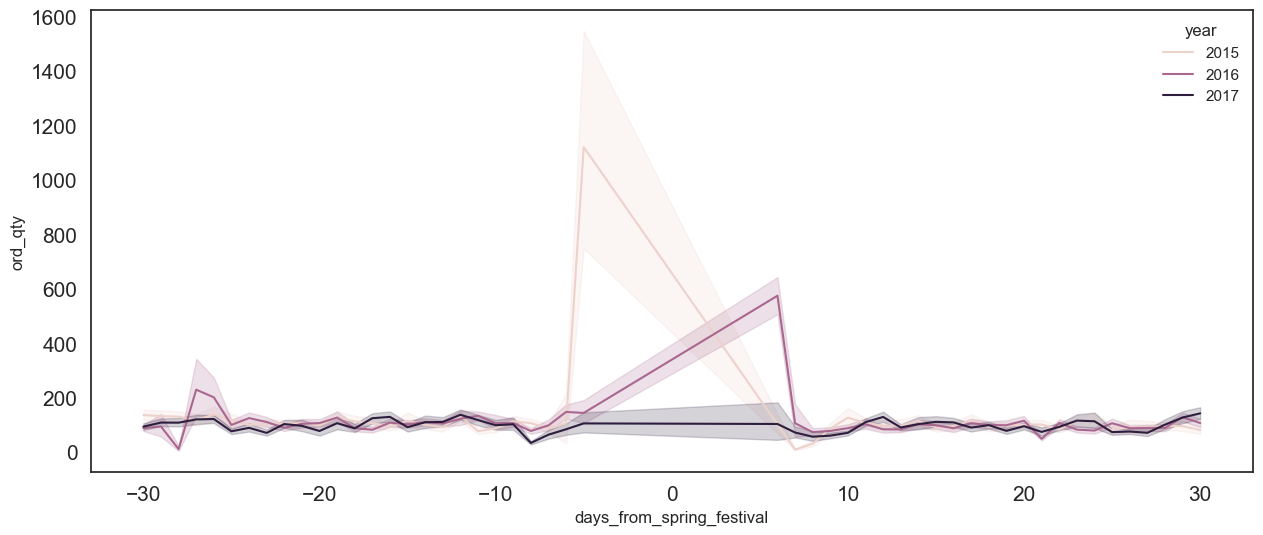

In [26]:
# 春节日期列表
chinese_new_years = [
    pd.to_datetime('2016-02-08'),
    pd.to_datetime('2017-01-28'),
    pd.to_datetime('2018-02-16')
]

# 初始化一个空的 DataFrame，用于存储春节前后60天的数据
spring_festival_data = pd.DataFrame()

# 获取春节前后60天的数据
for year, new_year in enumerate(chinese_new_years, 2015):
    start_date = new_year - pd.DateOffset(days=30)
    end_date = new_year + pd.DateOffset(days=30)
    
    year_data = train_cleaned[(train_cleaned['order_date'] >= start_date) & (train_cleaned['order_date'] <= end_date)].copy()
    year_data['days_from_spring_festival'] = (year_data['order_date'] - new_year).dt.days
    year_data['year'] = year
    spring_festival_data = spring_festival_data.append(year_data)

# 绘制时间序列折线图
plt.figure(figsize=(15, 6))
sns.lineplot(x='days_from_spring_festival', y='ord_qty', hue='year', data=spring_festival_data)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## （7） 促销（如 618、双十一等）对产品需求量的影响

## （8）季节因素对产品需求量的影响